# Word Embeddings

Welcome to the second notebook of this assignment! Word embeddings are numerical representations of words. We can represent words as vectors and maintain their meaning. There are various ways of finding vecotrs for words, equivalently, word embeddings. We explore some of these techniques in this notebook.

## Tabel of Contents

- 1- GloVe: Global Vectors for Word Representation
  - 1.1- Exploring word vectors
  - 1.2- Visualizing in 2-D
- 2- Evaluation
  - 2.1- Cosine similarity
  - 2.2- A little test set
- 3- Learn embeddings
  - 3.1- Co-occurences
  - 3-2. SVD
- 4- Sentiment Analysis of MDB Movie Reviews
  - 4.1- Dataset
  - 4.2- Model
  - 4.3- Train
  - 4.4- Results

## 1- GloVe: Global Vectors for Word Representation

### 1.1- Exploring word vectors

What is the number of words in vocabulary? What is the dimensionality of word vectors?

|         | man   | woman | king  | queen | apple | orange |
| ---     | ---   | ---   |   --- | ---   | ---   |  ---   |
| gender  | -0.99 | 1     | -0.95 | 0.97  | u     | 0.01   |
| royalty | 0.01  | 0.02  | 0.93  | 0.95  | -0.01 | 0.00   |
| fruit   | 0.03  | x     | y     | z     | 0.94  | v      |

What would be the values of $x, y, z, u, v$ and why?

man - woman = king - queen

In [ ]:
# pip install gensim

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
   - -------------------------------------- 1.0/24.0 MB 2.5 MB/s eta 0:00:10
   -- ------------------------------------- 1.3/24.0 MB 2.6 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/24.0 MB 2.5 MB/s eta 0:00:10
   ---- ----------------------------------- 2.6/24.0 MB 2.6 MB/s eta 0:00:09
   ----- ---------------------------------- 3.4/24.0 MB 2.8 MB/s eta 0:00:08
   ------ --------------------------------- 4.2/24.0 MB 3.0 MB/s eta 0:00:07
   -------- ------------------------------- 5.2/24.0 MB 3.2 MB/s eta 0:00:06
   --------- ------------------------------ 5.8/24.0 MB 3.2 MB/s eta 0:00:06
   ----------- ---------------------------- 6.8/24.0 MB 3.4 MB/s eta 0:00:06
   ------------ ---

In [ ]:
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [ ]:
def print_model_attributes(model):
    vocab_size = len(model.key_to_index)
    embedding_dim = model[model.index_to_key[0]].shape[0]
    print(f"Vocab size: {vocab_size}")
    print(f"Embedding dimension: {embedding_dim}")
    return vocab_size, embedding_dim

In [ ]:
def plot_embeddings_2d(model, words, method="PCA", perplexity = None):
    embeddings = [model[word] for word in words]

    if method == "PCA":
        reducer = PCA(n_components=2)
    elif method == "tSNE":
        reducer = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    else:
        raise ValueError("Invalid method. Choose 'PCA' or 'tSNE'")

    reduced_embeddings = reducer.fit_transform(np.array(embeddings))

    # plot
    plt.figure(figsize=(10, 10))
    for i, word in enumerate(words):
        x, y = reduced_embeddings[i]
        plt.scatter(x, y, label=word)
        plt.text(x+0.01, y+0.01, word, fontsize=12)

    plt.title(f"Word Embeddings Visualization ({method})")
    plt.legend()
    plt.show()

In [ ]:
# مسیر محلی فایل pretrained GloVe
model_path = "glove.6B.300d.txt"  # مسیر فایل GloVe
print("Loading GloVe model from local file...")
model = KeyedVectors.load_word2vec_format(model_path, binary=False, no_header=True)
print("Model loaded!")

Loading GloVe model from local file...
Model loaded!


## Introduction to GloVe
GloVe (Global Vectors for Word Representation) is a pre-trained word embedding model developed by Stanford University. It is trained on large text corpora such as Wikipedia and Gigaword. The embeddings capture the semantic meaning of words, so words with similar meanings are represented by similar vectors in the embedding space.

The specific file `glove.6B.300d.txt` contains word vectors of size 300 (300-dimensional embeddings) trained on a dataset of 6 billion tokens from Wikipedia and Gigaword.

## Vocabulary in GloVe
The vocabulary refers to the set of all words (or tokens) in the dataset for which embeddings are provided. Each word is represented as a dense vector of real numbers.

- **Vocabulary Size:** The size of the vocabulary is the number of unique words in the dataset.
- **Embedding Dimension:** This represents the length of the vector used to encode each word. For `glove.6B.300d.txt`, the dimension is 300.

## Key Attributes of the Loaded Model
When the GloVe file is loaded using `gensim.models.KeyedVectors`, the following attributes are available:

### `index_to_key`
- **Description:** A list of all the words (tokens) in the vocabulary in the order they were loaded.
- **Example Usage:** To access the 10th word in the vocabulary:
    ```python
  model.index_to_key[9]

### `key_to_index`
- **Description**: A dictionary mapping each word (token) to its corresponding index in the vocabulary.
- **Example Usage**: To get the index of the word "king":
    ```python
    model.key_to_index["king"]
### `vectors`
- **Description**: A NumPy array of shape (vocab_size, embedding_dim) where each row corresponds to the embedding of a word in the vocabulary.
- **Example Usage**: To access the vector for the word "queen":
    ```python
    model["queen"]

### `get_vector(word)`
- **Description**: A method to retrieve the embedding vector for a specific word.
- **Example Usage:**
    ```python
    embedding_vector = model.get_vector("apple")


In [ ]:
def print_model_attributes(model):
    vocab_size = len(model.key_to_index)
    embedding_dim = model[model.index_to_key[0]].shape[0]
    print(f"Vocab size: {vocab_size}")
    print(f"Embedding dimension: {embedding_dim}")
    return vocab_size, embedding_dim

vocab_size, embedding_dim = print_model_attributes(model)

Vocab size: 400000
Embedding dimension: 300


In [ ]:
words = ["tall", "taller", "tallest", "big", "bigger", "biggest", "wide", "wider", "widest"]
words1 = ["smart", "smarter", "smartest", "wide", "wider", "widest", "small", "smaller", "smallest"]
words2 = ["man", "woman", "king", "queen", "boy", "girl", "husband", "wife"]
print(len(words))
print(len(words1))
print(len(words2))

9
9
8


In [ ]:
words = [word for word in words if word in model]
words1 = [word for word in words1 if word in model]
words2 = [word for word in words2 if word in model]
print(len(words))
print(len(words1))
print(len(words2))

9
9
8


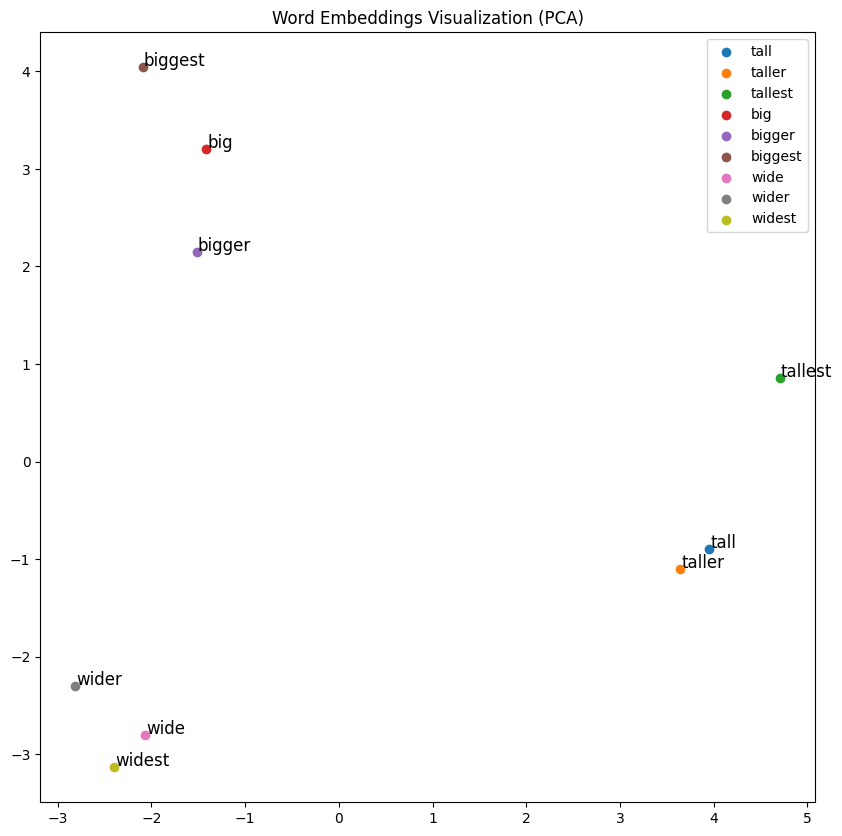

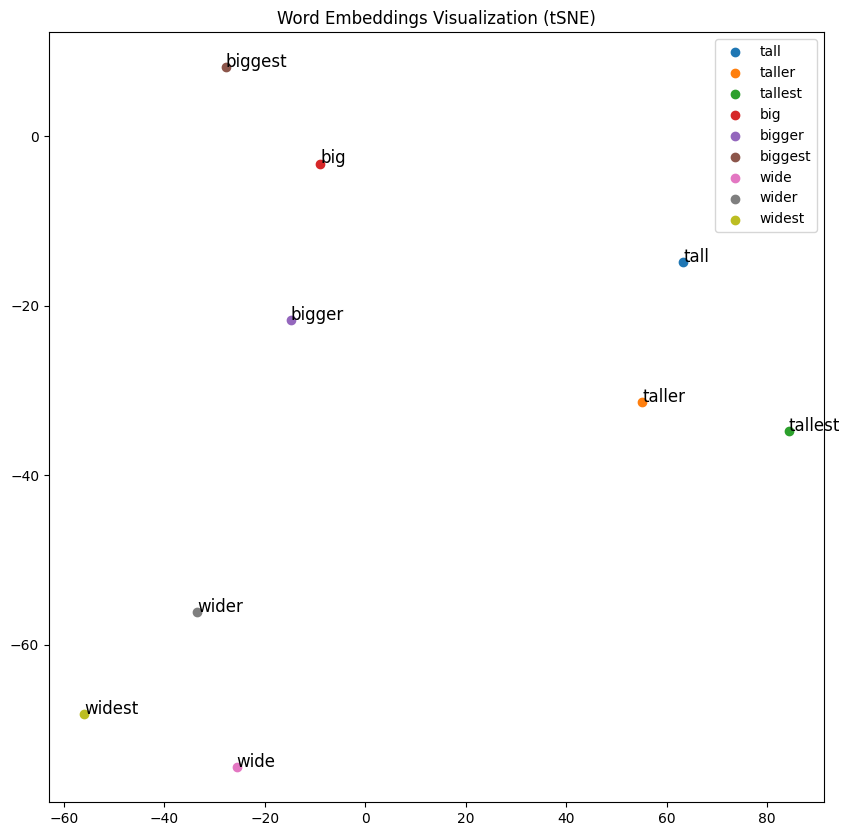

In [ ]:
plot_embeddings_2d(model, words, method="PCA")
plot_embeddings_2d(model, words, method="tSNE", perplexity = 3)


### 1.2- Visualizing in 2-D

tall -> taller -> tallest, big -> bigger -> biggest

## 2- Evaluation

To evaluate the quality of word vectors, we should look at the similarity of word vectors that are semantically similar, for example word *France* is similar to *Italy*, so their word vectors should be similar. One common metric to measure the distance between word vectors is the **cosine similarity**. The cosine similarity between two words $w_x$ and $w_y$ is defined as
$$
cos(w_x, w_y) = \frac{w_x^Tw_y}{||w_x|| ||w_y||}
$$
, where $||.||$ is the $l_2$ norm.

One evaluation approach that was introduced in [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781) is to consider two pairs of words that have the same type of relationship, for example, *big - bigger* and *small - smaller*. Each two pairs can be viewed as a question: ”What is the word that is similar to small in the same sense as bigger is similar to big?”.

Interestingly, these questions can be answered by doing basic algebraic operations on the word vectors. First we compute $$x = w_{bigger}-w_{big}+w_{small}$$, and then search through all possible word vectors to find the closest one to $x$. In this notebook we use cosine similarity to measure closeness. So the problem can be written as $$ w^{*} = \argmax_{w} cos(w, w_{bigger}-w_{big}+w_{small}) $$.

In [1]:
test_set = [
    ["Paris", "France", "Toronto", "Canada"],
    ["Australia", "dollar", "Japan", "yen"],
    ["Chicago", "Illinois", "Stockton", "California"],
    ["brother", "sister", "father", "mother"],
    ["apparent", "apparently", "rapid", "rapidly"],
    ["possibly", "impossibly", "ethical", "ethically"],
    ["great", "greater", "tough", "tougher"],
    ["easy", "easiest", "lucky", "luckiest"],
    ["think", "thinking", "read", "reading"],
    ["Switzerland", "Swiss", "Turkey", "Turkish"],
    ["walking", "walked", "swimming", "swam"],
    ["mouse", "mice", "dollar", "dollars"],
    ["work", "works", "speak", "speaks"],
]

## 3- Learn embeddings

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords



import pandas as pd
import numpy as np
import re
from collections import defaultdict
import spacy
import multiprocessing
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
import random
from sklearn.decomposition import PCA

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)



---

## **Overview**
This notebook guides students through the process of cleaning a dataset, visualizing tokens, creating word embeddings using a co-occurrence matrix, and applying Singular Value Decomposition (SVD) to reduce dimensionality. Each section contains explanations and relevant Python code.

---

## **Part 1: Dataset Loading and Preprocessing**

### Explanation
In this section, students will:
1. Load the Simpsons dataset.
2. Clean the text data by removing stop words, lemmatizing words, and filtering tokens.
3. Visualize the top tokens using a WordCloud.


In [2]:
df = pd.read_csv('simpsons_dataset.csv')
print(f"Initial Dataset Shape: {df.shape}")
df

Initial Dataset Shape: (158314, 2)


,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
...,...,...
158309,Miss Hoover,I'm back.
158310,Miss Hoover,"You see, class, my Lyme disease turned out to ..."
158311,Miss Hoover,Psy-cho-so-ma-tic.
158312,Ralph Wiggum,Does that mean you were crazy?


In [3]:
df.isnull().sum()

raw_character_text    17814
spoken_words          26459
dtype: int64

In [4]:
# Drop missing values
df = df.dropna().reset_index(drop=True)
print(f"Dataset Shape after Dropping NaNs: {df.shape}")

Dataset Shape after Dropping NaNs: (131853, 2)


In [5]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fraxea/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/fraxea/nltk_data...


True

In [6]:
# Create a set of stop words
stop_words = set(stopwords.words('english'))

# Add custom stop words using update()
# you can other stop words to this list if you want
stop_words.update([
    "i'm", "i'll", "this'll", "what'l", "that's", "he", "he'd", "she", "she'd",
    "it", "they", "him", "her", "his", "their", "but", "for", "nor", "so",
    "with", "by", "be", "have", "do", "can", "will", "may", "very", "really",
    "just", "then", "now", "there", "where", "how", "like", "uh", "um",
    "you know", "oh", "well",
    "that", "these", "those", "each", "every", "some", "any", "all",
    "one", "two", "three", "four", "five", "six", "seven", "eight",
    "nine", "ten", "much", "many", "more", "most", "less", "least",
    "same", "other", "another", "which", "whoever", "whomever",
    "whichever", "whatsoever", "could", "would", "should", "might",
    "must", "shall", "can", "may", "if", "as", "than", "while",
    "because", "although", "since", "unless", "whereas", "before",
    "after", "during", "while", "about", "along", "among", "but",
    "yet", "for", "nor", "so", "either", "neither", "whether",
    "instead", "regarding", "despite", "although", "not", "never",
    "ever", "just", "really", "very", "quite", "too", "still",
    "yet", "also", "especially", "particularly", "simply",
    "actually", "literally", "essentially", "virtually", "truly",
    "specially", "in fact", "on the other hand", "in addition",
    "meanwhile", "however", "therefore", "furthermore", "likewise",
    "consequently", "subsequently", "additionally", "moreover",
    "notably", "here", "there", "when", "where", "what", "why",
    "who", "whom", "whose", "which", "how", "a", "an", "the",
])

# Print the updated stop words
print(stop_words)


{'again', 'our', 'aren', 'well', "you'd", "should've", 've', 'seven', 'while', 'might', 'therefore', 'has', 'you know', 'despite', 're', 'whomever', 'won', 'since', 'because', 'after', 'me', "she's", 'every', 'off', 'ours', 'but', 't', 'further', 'ourselves', 'can', 'wouldn', "needn't", "mightn't", 'all', 'for', 'what', 'against', "mustn't", 'regarding', 'theirs', 'when', 'needn', 'yet', 'some', "aren't", 'of', 'whoever', 'haven', 'them', 'had', "what'l", 'too', 'few', 'could', 'consequently', 'have', 'himself', 'mightn', 'she', 'i', 'really', 'mustn', 'many', 'essentially', "couldn't", 'actually', 'especially', 'up', 'whatsoever', 'may', 'd', 'least', "didn't", 'uh', 'hasn', 'you', 'notably', 'weren', "shouldn't", 'quite', 'myself', 'in addition', 'however', 'four', 'yourselves', 'him', 'to', "haven't", 'below', 'should', 'o', "she'd", "isn't", 'nor', 'whichever', 'through', 's', 'so', 'just', 'why', 'likewise', 'over', 'most', 'between', 'don', 'either', "he'd", 'your', 'moreover', '

In [7]:
# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Cleans input text by removing non-alphabetic characters,
     lowercasing, removing stopwords, and lemmatizing."""

    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub("[^A-Za-z']+", ' ', str(text)).lower()

    # Tokenize and remove stop words, apply lemmatization
    tokens = text.split()
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # Return cleaned text if it has more than 2 tokens
    if len(cleaned_tokens) > 2:
        return ' '.join(cleaned_tokens)



In [8]:
# Apply cleaning
df['spoken_words_clean'] = df['spoken_words'].apply(clean_text)


In [9]:
# Drop NaN values and duplicates after cleaning
df_clean = df[['spoken_words', 'spoken_words_clean']].dropna().drop_duplicates()
df_clean = df_clean.rename(columns={'spoken_words_clean': 'clean'})
# Display cleaned dataframe
print(f"Cleaned Dataset Shape: {df_clean.shape}")
df_clean

Cleaned Dataset Shape: (90682, 2)


,spoken_words,clean
0,"No, actually, it was a little of both. Sometim...",little sometimes disease magazine news show na...
1,Where's Mr. Bergstrom?,where's mr bergstrom
2,I don't know. Although I'd sure like to talk t...,know i'd sure talk touch lesson plan teach
3,That life is worth living.,life worth living
4,The polls will be open from now until the end ...,poll open end recess case decided put thought ...
...,...,...
131835,Can I dye my shoes pink?,dye shoe pink
131846,"Mr. Bergstrom, we request the pleasure of your...",mr bergstrom request pleasure company mr bergs...
131847,"Good morning, Lisa.",good morning lisa
131849,"You see, class, my Lyme disease turned out to ...",see class lyme disease turned


In [10]:
sample_examples = df_clean.sample(15, random_state=8)

print("=== Sample Cleaning Examples ===\n")

for index, row in sample_examples.iterrows():
    print(f"Example {index + 1}:")
    print(f"------------------")
    print(f"Original: {row['spoken_words']}")
    print(f"Cleaned:  {row['clean']}")
    print(f"------------------\n")

print("===============================")



=== Sample Cleaning Examples ===

Example 6728:
------------------
Original: Hey, what's with the skirt?
Cleaned:  hey what's skirt
------------------

Example 80553:
------------------
Original: Well, I'm an office manager, and no, I didn't even get a promotion today, again. So go on, go ahead. Disembowel me with your pointy, pointy words.
Cleaned:  office manager even get promotion today go go ahead disembowel pointy pointy word
------------------

Example 113894:
------------------
Original: How many bottles of this Kentucky Kool Aid do you have?
Cleaned:  bottle kentucky kool aid
------------------

Example 85790:
------------------
Original: Upsy-daisy, sir.
Cleaned:  upsy daisy sir
------------------

Example 91140:
------------------
Original: Bullet-proof glass.
Cleaned:  bullet proof glass
------------------

Example 82235:
------------------
Original: Can't talk now! I'm spanking a child!
Cleaned:  can't talk spanking child
------------------

Example 104138:
----------------

In [11]:
df_clean = df_clean.drop(columns=['spoken_words'])

df_clean

,clean
0,little sometimes disease magazine news show na...
1,where's mr bergstrom
2,know i'd sure talk touch lesson plan teach
3,life worth living
4,poll open end recess case decided put thought ...
...,...
131835,dye shoe pink
131846,mr bergstrom request pleasure company mr bergs...
131847,good morning lisa
131849,see class lyme disease turned


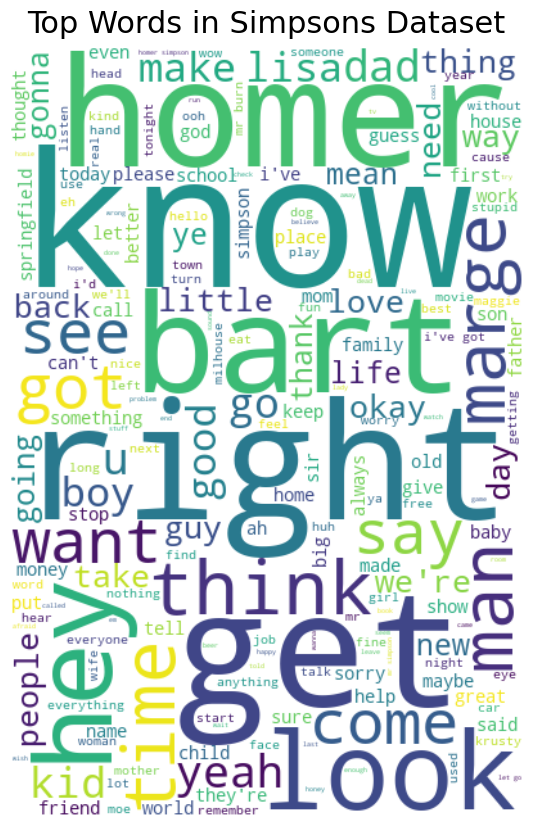

In [12]:
# Token Visualization: Create a word cloud
# Combine all cleaned texts into a single string
text = ' '.join(df_clean['clean'].tolist())

# Generate the word cloud
wc = WordCloud(
    background_color='white',
    stopwords=stop_words,
    max_words=200,
    height=600,
    width=400,
).generate(text)

# Display the word cloud
plt.figure(figsize=(18, 10))
plt.title('Top Words in Simpsons Dataset', fontdict={'size': 22, 'verticalalignment': 'bottom'})
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Part 2: Tokenization and Phrase Detection**

### Explanation
In this section, students will:
1. Tokenize cleaned sentences.
2. Use the Gensim Phrases and Phraser tools to detect common bigrams in the text.


In [13]:
# Tokenize sentences
sentences = [row.split() for row in df_clean['clean']]
sentences

[['little',
  'sometimes',
  'disease',
  'magazine',
  'news',
  'show',
  'natural',
  'think'],
 ["where's", 'mr', 'bergstrom'],
 ['know', "i'd", 'sure', 'talk', 'touch', 'lesson', 'plan', 'teach'],
 ['life', 'worth', 'living'],
 ['poll',
  'open',
  'end',
  'recess',
  'case',
  'decided',
  'put',
  'thought',
  "we'll",
  'final',
  'statement',
  'martin'],
 ['think', "there's", 'anything', 'left', 'say'],
 ['victory', 'party', 'slide'],
 ['mr', 'bergstrom', 'mr', 'bergstrom'],
 ['hey',
  'hey',
  'moved',
  'morning',
  'new',
  'job',
  'took',
  'copernicus',
  'costume'],
 ['think', "he's", 'taking', 'next', 'train', 'capital', 'city'],
 ['train', 'traditional', 'environmentally', 'sound'],
 ['yes',
  'backbone',
  'country',
  'leland',
  'stanford',
  'drove',
  'golden',
  'spike',
  'promontory',
  'point'],
 ['hey', 'thanks', 'vote', 'man'],
 ['vote', "voting's", 'geek'],
 ['got', 'right', 'thanks', 'vote', 'girl'],
 ['sweat', 'long', 'couple', 'people', 'right', 'milh

In [14]:
# Detect bigrams
phrases = Phrases(sentences, min_count=5, threshold=10, progress_per=10000)
bigram_model = Phraser(phrases)

# Transform sentences to include detected bigrams
bigram_sentences = bigram_model[sentences]

In [15]:
# Calculate word frequencies
word_freq = defaultdict(int)
for sent in bigram_sentences:
    for word in sent:
        word_freq[word] += 1

print(f"Total unique words: {len(word_freq)}")


Total unique words: 36246


## **Part 3: Creating a Co-occurrence Matrix**

### Explanation
Students will build a co-occurrence matrix where each entry represents how often two words appear together within a given context window.


In [16]:
# Define context window size
CONTEXT_WINDOW = 2

# Set a threshold for word frequency
min_freq = 10  # Adjust based on your dataset
filtered_vocab = {word: freq for word, freq in word_freq.items() if freq >= min_freq}



# Update the vocabulary and co-occurrence matrix
vocab = list(filtered_vocab.keys())
word_to_idx = {word: idx for idx, word in enumerate(vocab)}



In [17]:
# Initialize co-occurrence matrix
co_occurrence_matrix = np.zeros((len(vocab), len(vocab)), dtype=np.float32)


In [18]:
# Rebuild the co-occurrence matrix
for sent in bigram_sentences:
    for i, word in enumerate(sent):
        if word not in word_to_idx:
            continue
        center_idx = word_to_idx[word]
        for j in range(max(0, i - CONTEXT_WINDOW), min(len(sent), i + CONTEXT_WINDOW + 1)):
            if i != j and sent[j] in word_to_idx:
                context_idx = word_to_idx[sent[j]]
                co_occurrence_matrix[center_idx][context_idx] += 1

print(f"Reduced Co-occurrence Matrix Shape: {co_occurrence_matrix.shape}")

Reduced Co-occurrence Matrix Shape: (6653, 6653)


## **Part 4: Dimensionality Reduction Using SVD**

### Explanation
In this section, students will:
1. Apply Singular Value Decomposition (SVD) to reduce the dimensionality of the co-occurrence matrix.
2. Visualize word embeddings in a 2D space.


In [ ]:
## NOT RECOMMENDED

n_components = 10  # Number of components for reduced embeddings
U, S, Vt = np.linalg.svd(co_occurrence_matrix, full_matrices=False)
reduced_embeddings = U[:, :n_components]

In [90]:
# Perform SVD
from scipy.sparse.linalg import svds
n_components = 10  # Number of components for reduced embeddings
u, s, vt = svds(co_occurrence_matrix, k=n_components)
reduced_embeddings = u
# reduced_embeddings = u @ np.diag(s)

In [91]:
# Function for visualization (2D and 3D)
def visualize_embeddings(embeddings, vocab, dim=2, num_words=100):
    """
    Visualizes word embeddings in 2D or 3D.

    Args:
    - embeddings: Reduced embeddings (numpy array).
    - vocab: List of words corresponding to embeddings.
    - dim: Dimension of visualization (2 or 3).
    - num_words: Number of words to visualize.
    """
    if dim not in [2, 3]:
        raise ValueError("Visualization dimension must be 2 or 3.")

    # Select a random subset of words for visualization
    indices = np.random.choice(len(vocab), size=min(num_words, len(vocab)), replace=False)
    subset_embeddings = embeddings[indices]
    subset_vocab = [vocab[i] for i in indices]

    # Create DataFrame for visualization
    if dim == 2:
        df = pd.DataFrame({
            'word': subset_vocab,
            'x': subset_embeddings[:, 0],
            'y': subset_embeddings[:, 1]
        })

        # Plot 2D visualization
        plt.figure(figsize=(12, 8))
        plt.scatter(df['x'], df['y'], alpha=0.7, edgecolors='k')
        for i, word in enumerate(df['word']):
            plt.text(df['x'][i], df['y'][i], word, fontsize=9)
        plt.title('2D Visualization of Word Embeddings')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.show()

    elif dim == 3:
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(subset_embeddings[:, 0], subset_embeddings[:, 1], subset_embeddings[:, 2], alpha=0.7, edgecolors='k')
        for i, word in enumerate(subset_vocab):
            ax.text(subset_embeddings[i, 0], subset_embeddings[i, 1], subset_embeddings[i, 2], word, fontsize=9)
        ax.set_title('3D Visualization of Word Embeddings')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.set_zlabel('Component 3')
        plt.show()



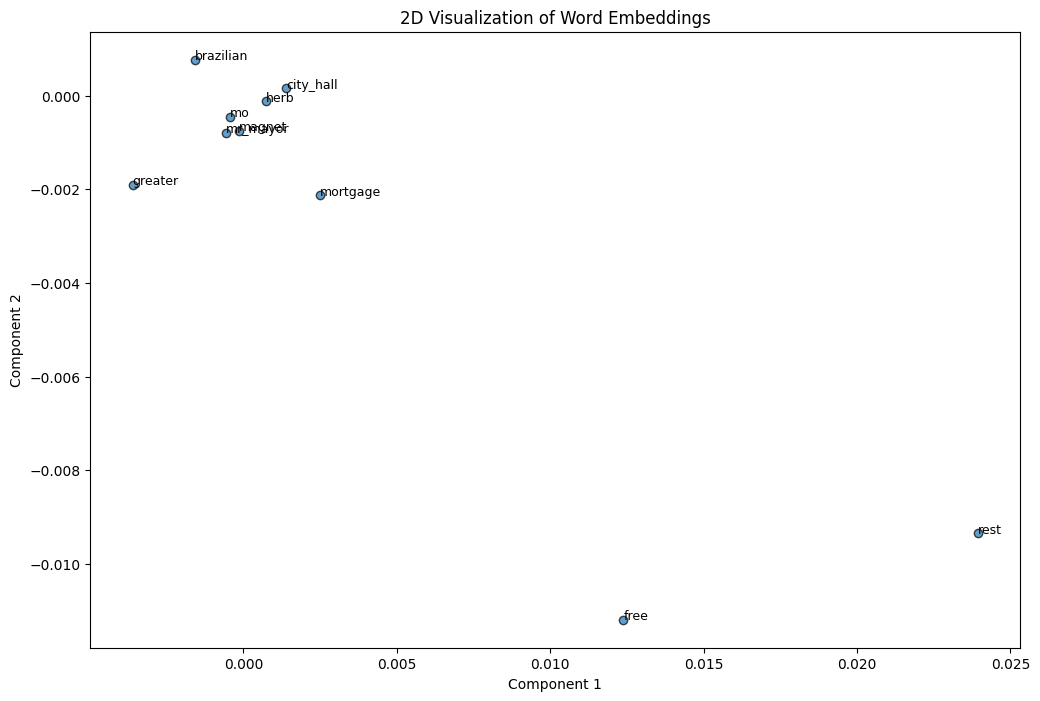

In [92]:
# Visualize in 2D and 3D
visualize_embeddings(reduced_embeddings, vocab, dim=2, num_words=10)


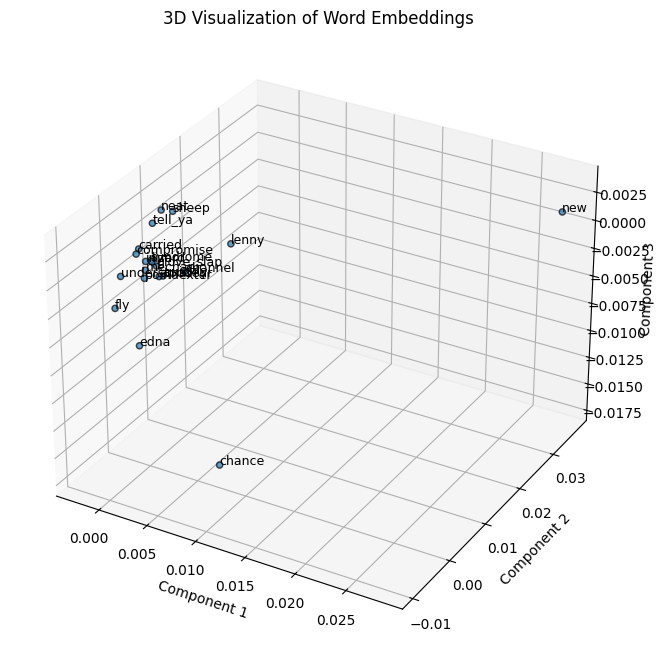

In [93]:
visualize_embeddings(reduced_embeddings, vocab, dim=3, num_words=20)


## **Part 5: Cosine Similarity**

### Explanation
Students will compute cosine similarity between word embeddings to find similar words.


In [94]:
# Define a function to calculate cosine similarity
def get_similar_words(word, top_n=5, embedding_dim=10):
    """
    Finds similar words based on cosine similarity.

    Args:
    - word: The word to find similarities for.
    - top_n: Number of similar words to return.
    - embedding_dim: Dimensionality of embeddings to use.

    Returns:
    - List of tuples with similar words and their similarity scores.
    """
    if word not in word_to_idx:
        return []

    # Use the selected dimensions for similarity calculation
    reduced_dim_embeddings = reduced_embeddings[:, :embedding_dim]
    word_vector = reduced_dim_embeddings[word_to_idx[word]].reshape(1, -1)
    similarities = cosine_similarity(word_vector, reduced_dim_embeddings)[0]
    similar_indices = similarities.argsort()[-top_n - 1:][::-1][1:]
    return [(vocab[i], similarities[i]) for i in similar_indices]

# Example: Find words similar to 'homer'
similar_words = get_similar_words('homer', top_n=5, embedding_dim=5)
print("Words similar to 'homer':", similar_words)


Words similar to 'homer': [('missy', 0.99877155), ('contest', 0.99535906), ('soul_mate', 0.99388176), ('hopeless', 0.98562807), ('touched', 0.98415387)]


In [95]:
def get_dissimilar_words(word, top_n=5, embedding_dim=10):
    """
    Finds dissimilar words based on cosine similarity.

    Args:
    - word: The word to find dissimilarities for.
    - top_n: Number of dissimilar words to return.
    - embedding_dim: Dimensionality of embeddings to use.

    Returns:
    - List of tuples with dissimilar words and their similarity scores.
    """
    if word not in word_to_idx:
        return []

    # Use the selected dimensions for similarity calculation
    reduced_dim_embeddings = reduced_embeddings[:, :embedding_dim]
    word_vector = reduced_dim_embeddings[word_to_idx[word]].reshape(1, -1)
    similarities = cosine_similarity(word_vector, reduced_dim_embeddings)[0]
    dissimilar_indices = similarities.argsort()[:top_n]
    return [(vocab[i], similarities[i]) for i in dissimilar_indices]

# Example: Find dissimilar words to 'homer'
dissimilar_words = get_dissimilar_words('homer', top_n=5, embedding_dim=5)
print("Words dissimilar to 'homer':", dissimilar_words)


Words dissimilar to 'homer': [('considered', -0.99637705), ('growing', -0.9940223), ('battery', -0.99326515), ('teaching', -0.98960775), ('marvelous', -0.98749775)]


In [96]:
def get_closest_words_to_vector(vector, top_n=5, embedding_dim=10):
    """
    Finds words closest to a given vector in embedding space.

    Args:
    - vector: A vector (numpy array) to compare against embeddings.
    - top_n: Number of closest words to return.
    - embedding_dim: Dimensionality of embeddings to use.

    Returns:
    - List of tuples with closest words and their similarity scores.
    """
    reduced_dim_embeddings = reduced_embeddings[:, :embedding_dim]
    vector = vector.reshape(1, -1)
    similarities = cosine_similarity(vector, reduced_dim_embeddings)[0]
    closest_indices = similarities.argsort()[-top_n:][::-1]
    return [(vocab[i], similarities[i]) for i in closest_indices]

# Example: Find closest words to a random vector
random_vector = np.random.rand(10)  # Example custom vector with same dim as embedding_dim
closest_words = get_closest_words_to_vector(random_vector, top_n=5, embedding_dim=10)
print("Words closest to the random vector:", closest_words)


Words closest to the random vector: [("fat_tony's", 0.7382300849354193), ('auto', 0.7075492848695295), ('fatty', 0.7054776765411854), ('bos', 0.6978353469955699), ('umm', 0.6860743186638496)]


In [97]:
def find_analogy(word_a, word_b, word_c, top_n=1, embedding_dim=10):
    """
    Solves word analogy: word_a - word_b + word_c = ?

    Args:
    - word_a, word_b, word_c: Words for the analogy equation.
    - top_n: Number of closest words to return.
    - embedding_dim: Dimensionality of embeddings to use.

    Returns:
    - List of tuples with the closest words and their similarity scores.
    """
    for word in [word_a, word_b, word_c]:
        if word not in word_to_idx:
            return []

    reduced_dim_embeddings = reduced_embeddings[:, :embedding_dim]
    vec_a = reduced_dim_embeddings[word_to_idx[word_a]]
    vec_b = reduced_dim_embeddings[word_to_idx[word_b]]
    vec_c = reduced_dim_embeddings[word_to_idx[word_c]]

    # Calculate analogy vector
    analogy_vector = vec_a - vec_b + vec_c

    # Find closest words
    return get_closest_words_to_vector(analogy_vector, top_n, embedding_dim)

# Example: Solve analogy "king - man + woman"
analogy_result = find_analogy('king', 'man', 'woman', top_n=5, embedding_dim=10)
print("Result of analogy 'king - man + woman':", analogy_result)


Result of analogy 'king - man + woman': [('defend', 0.69845784), ('register', 0.69760865), ('gifted', 0.6909214), ('buddhist', 0.6805406), ('frightened', 0.6748301)]


In [98]:
def get_neighbors_of_group(words, top_n=5, embedding_dim=10):
    """
    Finds nearest neighbors for a group of words.

    Args:
    - words: List of words to find collective neighbors for.
    - top_n: Number of neighbors to return.
    - embedding_dim: Dimensionality of embeddings to use.

    Returns:
    - List of tuples with the closest words and their similarity scores.
    """
    valid_words = [word for word in words if word in word_to_idx]
    if not valid_words:
        return []

    reduced_dim_embeddings = reduced_embeddings[:, :embedding_dim]
    group_vector = np.mean([reduced_dim_embeddings[word_to_idx[word]] for word in valid_words], axis=0).reshape(1, -1)
    similarities = cosine_similarity(group_vector, reduced_dim_embeddings)[0]
    similar_indices = similarities.argsort()[-top_n:][::-1]
    return [(vocab[i], similarities[i]) for i in similar_indices if vocab[i] not in words]

# Example: Find neighbors of the group ['homer', 'bart']
group_neighbors = get_neighbors_of_group(['homer', 'bart'], top_n=5, embedding_dim=5)
print("Neighbors of the group ['homer', 'bart']:", group_neighbors)


Neighbors of the group ['homer', 'bart']: [('tainted', 0.9874797), ('drawn', 0.9865186), ('get_rid', 0.98565567), ('walk_away', 0.98140943), ("there's_something", 0.9801488)]


In [46]:
import torch
import torch.nn as nn

import re

In [47]:
df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [48]:
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", ' ', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)
    return s

df['sentiment'] = df['sentiment'].map(lambda x: int(x == 'positive'))
df['review'] = df['review'].map(preprocess_string)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production br br The filmin...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically theres a family where a little boy J...,0
4,Petter Matteis Love in the Time of Money is a ...,1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,Bad plot bad dialogue bad acting idiotic direc...,0
49997,I am a Catholic taught in parochial elementary...,0
49998,Im going to have to disagree with the previous...,0


<Axes: >

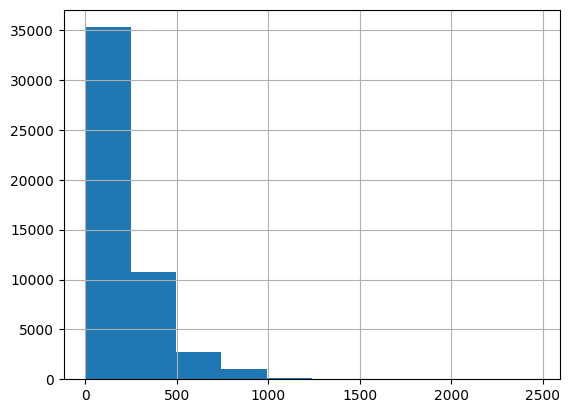

In [49]:
lengths = df['review'].map(lambda s: len(s.split(' ')))
lengths.hist()

In [60]:
def _tokenize(s):
    return [word_to_idx[word] for word in s.split()[:512] if word in vocab]

X = df.iloc[:1000]['review'].map(_tokenize)
X

0      [4974, 965, 4686, 3057, 65, 2368, 488, 146, 22...
1      [340, 0, 1424, 5332, 1, 285, 2000, 897, 1166, ...
2      [28, 340, 74, 993, 198, 768, 4270, 424, 3446, ...
3      [1169, 0, 538, 2646, 3280, 352, 1720, 2885, 51...
4      [2285, 1390, 5136, 4957, 1152, 1720, 304, 508,...
                             ...                        
995    [4631, 447, 320, 494, 2691, 1720, 2589, 3728, ...
996    [349, 156, 2368, 1914, 2285, 895, 228, 441, 52...
997    [866, 273, 1561, 3122, 1720, 1252, 380, 762, 7...
998    [2823, 86, 315, 2285, 1515, 115, 764, 2823, 11...
999    [2823, 2873, 3014, 4393, 5254, 6283, 1036, 245...
Name: review, Length: 1000, dtype: object

In [70]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

X = padding_(X.values, 512)

In [73]:
y = df['sentiment'][:len(X)].values
X.shape, y.shape

((1000, 512), (1000,))

In [105]:
X = reduced_embeddings[X].reshape(len(X), -1)
X.shape

(1000, 5120)

In [109]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
X_train.shape

(800, 5120)

In [108]:
lg_model = LogisticRegression()

In [112]:
lg_model.fit(X_train, y_train)
y_train_pred = lg_model.predict(X_train)
y_train_pred.shape

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



(800,)

In [113]:
accuracy_score(y_train, y_train_pred)

0.795

In [115]:
accuracy_score(y_val, lg_model.predict(X_val))

0.49